# Lynden vs Brown Yor Energy Density


### Brown and York don't agree on energy density ?.
### what is happening is that energy density as measured by Lynden-Bell 1985 uses fundamentally isotropic coords, so the energy density I get is isotropic energy density measured at the Schwarschild coord R

Conclusion - use Brown York, as I am in general not using isotropic coords.


In [15]:
import sympy
import matplotlib.pyplot as plt
import numpy as np
import einsteinpy

from sympy import symbols, sin, cos, sinh, ln, pi, sqrt
from sympy.utilities.lambdify import lambdify

from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()
print(einsteinpy.__version__)
import warnings
warnings.filterwarnings("ignore", category=UserWarning)




0.4.0


In [16]:
from sympy.abc import M, R, A
#lynden Bell 1985  Gravitational field energy density for spheres and black holes

# a is r_bar in the lynden Bell paper, bottom of page 23p 
a = (R - M + sqrt(R*(R - 2*M)))/2  

# E_d is The energy density relation in the lynden Bell paper, almost bottom of page 23p 
E_d = 1/(8*pi)*(M/((a**2)*((1 + M/(2*a)))**3))**2
print(E_d)



#sympy.pprint(E_d)
#E_dR = E_d.subs(a, a)  
#E_dR = E_dR.simplify()

M**2/(8*pi*(M/(-M + R + sqrt(R*(-2*M + R))) + 1)**6*(-M/2 + R/2 + sqrt(R*(-2*M + R))/2)**4)


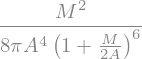

In [17]:
# E_dA is directly using isotropic coords 
E_dA = 1/(8*pi)*(M/((A**2)*((1 + M/(2*A)))**3))**2
E_dA

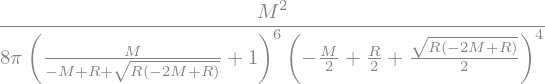

In [18]:
# E_dP is me PLAYING with the The energy density relation in the lynden Bell paper, almost bottom of page 23p 
E_dP = 1/(8*pi)*(M/((a**2)*((1 + M/(2*a)))**(3)))**2
E_dP


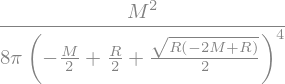

In [19]:
# E_d2 is the Lynden Bell - but approximated in the case of large r
E_d2 = M**2/(8*pi*a**4)
E_d2

(-M*sqrt((-2*M + R)/R) + 2*M + R*sqrt((-2*M + R)/R) - R)/(4*pi*R**2*(-2*M + R))


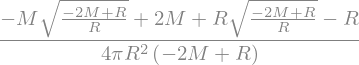

In [20]:
# E_d3 Brown York equation 6.18 divided by area of sphere
# Brown York 6.18 is an equation for Energy changing when dR is changed, but we want energy density...
E_d3 = -1/(4*pi)*(1 - (1 - M/R)/sqrt((1 - 2*M/R)))/R**2
E_d3 = E_d3.expand().simplify()
print(E_d3)
E_d3

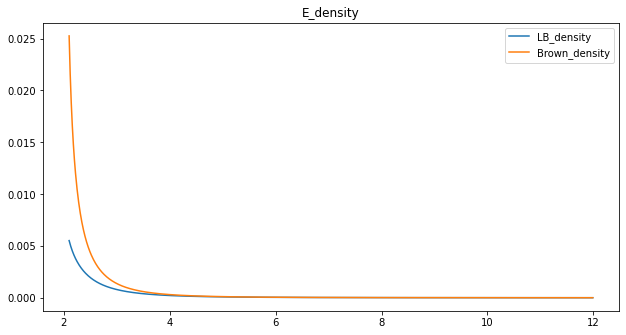

In [21]:
#wave front velocity as a function of r
# for a typical sine wave travelling along we have (v == velocity) 
#normalSin = sin(w*(syms[0] - syms[1]/v))
#so for us we have a wave front velocity - just mult by r/r and v
#normalSin = sin(w*(syms[0] - syms[1]/(syms[1]/ln(syms[1]*F)))
#M = 1
#Make x values - which we will sub in for r 
x = np.arange(2.1, 12, 0.01)
func = lambdify([R,M], E_d, "numpy")
func2 = lambdify([R,M], E_d2, "numpy")
func3 = lambdify([R,M], E_d3, "numpy")
func4 = lambdify([A,M], E_dA, "numpy")
func5 = lambdify([R,M], E_dP, "numpy")
m_val = 1.0
E_dVals = func(x, m_val)
E_d2Vals = func2(x, m_val)
E_d3Vals = func3(x, m_val)
E_d4Vals = func4(x, m_val)
E_d5Vals = func5(x, m_val)
#E_dVals = E_dR.evalf(subs={R: x})
# print(E_dVals)
# print(E_d2Vals)

fig=plt.figure(figsize=(8, 4))
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,E_dVals, label="LB_density")
#ax.plot(x,E_d2Vals, label="E2_density")
ax.plot(x,E_d3Vals, label="Brown_density")
#ax.plot(x,E_d4Vals, label="LB_Iso_density")
#ax.plot(x,E_d5Vals, label="LB_density-PLAYFull")

ax.set_title("E_density")

ax.legend(loc="upper right")


# Energy density in York-Brown 1993 does not match the energy density in Lynden Bell as one approaches the BH

### as I say, I think the LB result uses isotropic coords as a start, so when energy density in isotropic coords is expressed in terms of a cannonical Schwarshild R, we get a finite answer at the horizon. 

Energy density is finite at the horizon - physically, so the LB result makes more (local) sense. Both results are correct, - the Brown York one shows energy density in units of Scwharschild R near the horizon, while the LB uses isotropic units for it, but one can of course use Scwharshild coords to look up the isotropic energy density at the horizon.

## Various Wolfram links

* York Brown Energy - derivative [wolfram ](https://www.wolframalpha.com/input?i=derivative+of+x%281+-+%281+-+2M%2Fx%29%5E%281%2F2%29%29).

* (2M - York Brown Energy) - Lynden-Bell pag 24p - constant  [wolfram ](https://www.wolframalpha.com/input?i=simplify+2M+-+x%281+-+%281+-+2M%2Fx%29%5E%281%2F2%29%29+%2B+M%5E2%2F%28x+-+M+%2B+%28x%28x+-+2M%29%29%5E%281%2F2%29%29).
    
    So the York Brown Energy and the Lynden Bell one are related it seems. 
    
    One measures energy inside a radius R, the other one outside a radius R, add them together, get a constant - the mass of the black hole.
    
    But if that is the case then why in the image do the energy densities not agree?


### 